# Problem 3

## Context

In Deep Learning, it is impractical to hold complete datasets in memory at once. For instance, the [ImageNet-1k](https://en.wikipedia.org/wiki/ImageNet) datasets contains over 1,281,167 images from 1000 classes. Assuming each image being a $(3,224,224)$ tensor of pixels, and each pixel being encoded by a 8-bit integer, one has $150.53$ _KB_ per image. Overall, the total size of the dataset is $192.85$ _GB_, which is over 24 times the RAM memory of consumer-level laptops.

As a consequence, in Deep Learning practice one actually loads data into memory on-the-fly, that is, when training a neural net, you keep in memory only a couple of mini-batches needed for forward and backward passes.

## The Problem

You will write a class, called ```ImageDataset``` that will manage the access to individual images from a list of paths. You will work with datasets with the following directory structure,

```
root
|- class_1
| |- img_1
| |- img_2
| ...
| |- img_n
|- class_2
...
|- class_k
```

## Problem 3.1

Install [gdown](https://github.com/wkentaro/gdown) on Google Colab using,

In [ ]:
!pip install gdown

Import gdown on Google Colab,

In [ ]:
import os
import gdown
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Use the following snippet to download the [Office-31 Dataset](https://faculty.cc.gatech.edu/~judy/domainadapt/)

In [ ]:
url = "https://drive.google.com/uc?id=0B4IapRTv9pJ1WGZVd1VDMmhwdlE"
output = "office31_images.tar.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=0B4IapRTv9pJ1WGZVd1VDMmhwdlE
To: /content/office31_images.tar.zip
100%|██████████| 77.2M/77.2M [00:01<00:00, 51.2MB/s]


'office31_images.tar.zip'

Unzip the dataset contents,

In [ ]:
!mkdir "./office31"
!tar -xf "./office31_images.tar.zip" -C "./office31"

Note, in the next script we get the class names, which are folders inside ```./office31/dslr/images```,

In [ ]:
root = './office31/dslr/images'
class_names = os.listdir(root)

In [ ]:
class_names

['paper_notebook',
 'speaker',
 'tape_dispenser',
 'mug',
 'ring_binder',
 'projector',
 'mobile_phone',
 'bottle',
 'ruler',
 'mouse',
 'desk_lamp',
 'pen',
 'monitor',
 'laptop_computer',
 'scissors',
 'keyboard',
 'bike_helmet',
 'back_pack',
 'file_cabinet',
 'punchers',
 'bike',
 'stapler',
 'trash_can',
 'letter_tray',
 'printer',
 'bookcase',
 'headphones',
 'phone',
 'calculator',
 'desk_chair',
 'desktop_computer']

## Problem 3.2

### Class Specification

Your class needs to have the following attributes,

- ```root```: contains a string with the path to the root directory of the dataset. __It needs to be specified in the class constructor__.
- ```class_names```: a list containing the name of each class in the dataset
- ```class_name_to_int```: contains a dictionary, where keys are class names (e.g. backpack or bike), and the output is an integer specifying to which class the image belongs to (e.g. assign 0 to backpack and 1 to bike).
- ```filepaths```: contains the path of each image in the dataset. Should be set by running through the folds (starting from root).

and implement the following methods,

- ```__len__(self)```: returns the number of elements in the dataset.
- ```__getitem__(self, idx)```: Returns a tuple ```(x, y)```, where ```x``` is an image, and ```y``` is a label corresponding to ```self.filepaths[idx]```.

__Hint 1.__ You can use the following snippet for reading an image

```python
import numpy as np
from PIL import Image

im = np.array(Image.open(filepath))
```

__Important.__ here, filepath indicates the complete path to the file.

__Hint 2.__ For managing paths, and listing the files in a directory, use the [os library](https://docs.python.org/3/library/os.html). You can find a reference of the library [in here](https://www.geeksforgeeks.org/os-module-python-examples/).

__Hint 3.__ For debugging, it may be useful to use Matplotlib for visualizing the outputs of ```__getitem__```. If ```x``` is a numpy array of shape ```(h,w,c)```, you can use the following snippet to visualize your image,

```python
x, y = dataset[0]

plt.figure()
plt.imshow(x)
plt.title(f'Class: {y}')
plt.axis('off')
```

In [ ]:
class ImageDataset:
    def __init__(self, root):
        self.root = root
        sel```python
import numpy as np
from PIL import Image

im = np.array(Image.open(filepath))
```

__Important.__ here, filepath indicates the complete path to the file.

__Hint 2.__ For managing paths, and listing the files in a directory, use the [os library](https://docs.python.org/3/library/os.html). You can find a reference of the library [in here](https://www.geeksforgeeks.org/os-module-python-examples/).

__Hint 3.__ For debugging, it may be useful to use Matplotlib for visualizing the outputs of ```__getitem__```. If ```x``` is a numpy array of shape ```(h,w,c)```, you can use the following snippet to visualize your image,

```python
x, y = dataset[0]

plt.figure()
plt.imshow(x)
plt.title(f'Class: {y}')
plt.axis('off')
```f.class_names = os.listdir(root)
        self.class_names_to_int = {c: i for i, c in enumerate(class_names)}
        self.filepaths = [
            os.path.join(root, c, fname) for c in class_names for fname in os.listdir(os.path.join(root, c))
        ]

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        filepath = self.filepaths[idx]
        c = filepath.split('/')[-2]
        x = np.array(Image.open(filepath))
        y = self.class_names_to_int[c]

        return x, y

In [ ]:
dataset = ImageDataset(root='./office31/amazon/images')

In [ ]:
x, y = dataset[0]

In [ ]:
len(dataset)

2817

(-0.5, 299.5, 299.5, -0.5)

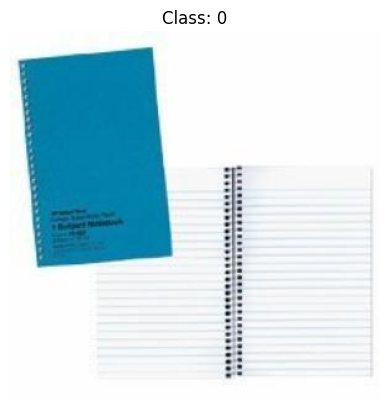

In [ ]:
plt.imshow(x)
plt.title(f'Class: {y}')
plt.axis('off')